## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

### 2. Load the dataset and display a sample of five rows of the data frame.

In [11]:
df = pd.read_csv('/Users/vasu/Downloads/heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [12]:
df.shape

(319795, 18)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [14]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [15]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

In [16]:
df_cleaned = df.dropna()
df_cleaned.shape

(319795, 18)

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [17]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape[0]

18078

In [18]:
df_no_duplicates = df.drop_duplicates()
df_no_duplicates.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

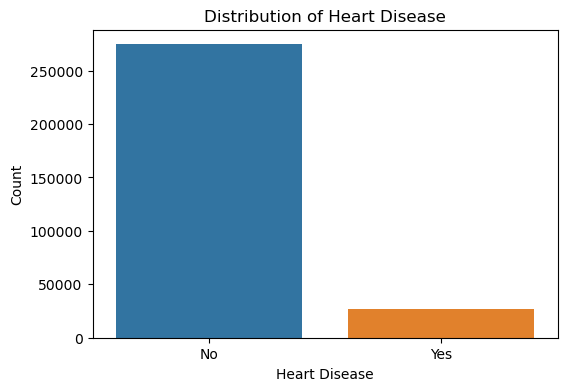

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [19]:
target_distribution = df_no_duplicates['HeartDisease'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_no_duplicates, x='HeartDisease')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

target_distribution
#Observations:

#The distribution indicates how many individuals in the dataset have been diagnosed with heart disease (1) and how many have not (0).
#If the distribution is balanced or slightly imbalanced, it should be suitable for building classification models.

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

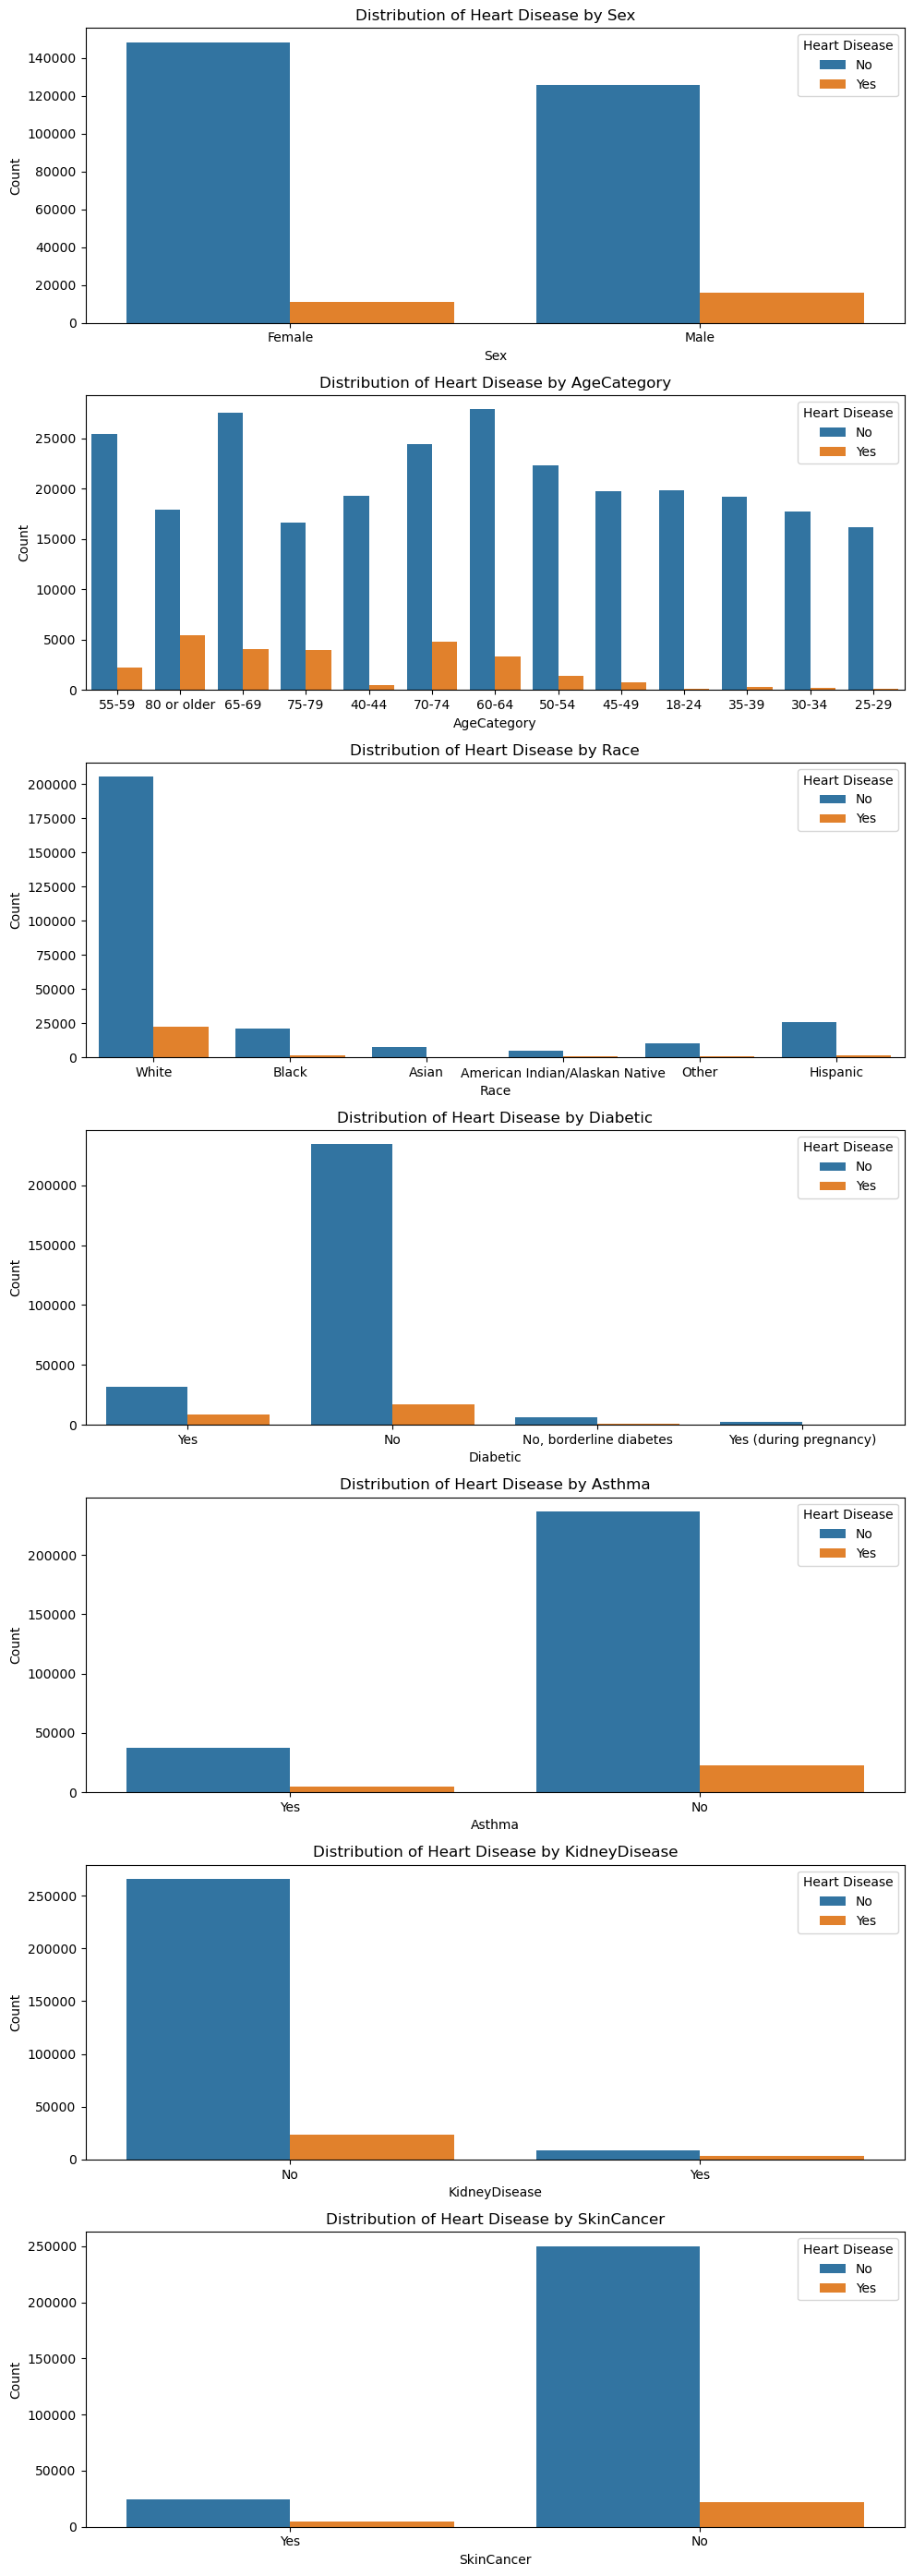

In [20]:
categorical_features = ['Sex', 'AgeCategory', 'Race', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']

num_rows = len(categorical_features)
num_cols = 1
plt.figure(figsize=(10, 4 * num_rows))

for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df_no_duplicates, x=feature, hue='HeartDisease')
    plt.title(f'Distribution of Heart Disease by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()
#Observations:

#These plots visualizes the distribution of heart disease varies across different categorical features.
#These visualizations can provide insights into potential relationships between categorical features and heart disease.

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [21]:
unique_categories = df_no_duplicates['Diabetic'].unique()
print("Unique categories in 'Diabetic' column:", unique_categories)

replacement_mapping = {
    'Yes (during pregnancy)': 'Yes',
    'No, borderline diabetes': 'No'
}
df_no_duplicates['Diabetic'] = df_no_duplicates['Diabetic'].replace(replacement_mapping)

modified_unique_categories = df_no_duplicates['Diabetic'].unique()
modified_unique_categories

Unique categories in 'Diabetic' column: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


/var/folders/18/sxd5w0n16p1g2sphx5bcycg80000gn/T/ipykernel_24166/1636205238.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['Diabetic'] = df_no_duplicates['Diabetic'].replace(replacement_mapping)


array(['Yes', 'No'], dtype=object)

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [22]:
df_no_duplicates['HeartDisease'] = df_no_duplicates['HeartDisease'].replace({'No': 0, 'Yes': 1})

modified_unique_values = df_no_duplicates['HeartDisease'].unique()
print("Modified unique values in 'HeartDisease' column:", modified_unique_values)

Modified unique values in 'HeartDisease' column: [0 1]


/var/folders/18/sxd5w0n16p1g2sphx5bcycg80000gn/T/ipykernel_24166/957421421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['HeartDisease'] = df_no_duplicates['HeartDisease'].replace({'No': 0, 'Yes': 1})


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [23]:
label_encode_columns = ['AgeCategory', 'Race', 'GenHealth']

label_encoder = LabelEncoder()

for column in label_encode_columns:
    df_no_duplicates[column] = label_encoder.fit_transform(df_no_duplicates[column])

dummy_encode_columns = ['Sex', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']

df_encoded = pd.get_dummies(df_no_duplicates, columns=dummy_encode_columns, drop_first=True)

df_encoded.head()

/var/folders/18/sxd5w0n16p1g2sphx5bcycg80000gn/T/ipykernel_24166/3476093394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates[column] = label_encoder.fit_transform(df_no_duplicates[column])
/var/folders/18/sxd5w0n16p1g2sphx5bcycg80000gn/T/ipykernel_24166/3476093394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates[column] = label_encoder.fit_transform(df_no_duplicates[column])
/var/folders/18/sxd5w0n16p1g2sphx5bcycg80000gn/T/ipykernel_24166/3476093394.py:6: SettingWithC

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,PhysicalActivity,GenHealth,SleepTime,Sex_Male,Diabetic_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,Yes,No,No,3.0,30.0,No,7,5,Yes,4,5.0,0,1,1,0,1
1,0,20.34,No,No,Yes,0.0,0.0,No,12,5,Yes,4,7.0,0,0,0,0,0
2,0,26.58,Yes,No,No,20.0,30.0,No,9,5,Yes,1,8.0,1,1,1,0,0
3,0,24.21,No,No,No,0.0,0.0,No,11,5,No,2,6.0,0,0,0,0,1
4,0,23.71,No,No,No,28.0,0.0,Yes,4,5,Yes,4,8.0,0,0,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [24]:
y = df_encoded['HeartDisease']

X = df_encoded.drop(columns=['HeartDisease'])

X.shape
y.shape

(301717,)

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (211201, 17)
Shape of X_test: (90516, 17)
Shape of y_train: (211201,)
Shape of y_test: (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [26]:
scaler = StandardScaler()

In [29]:
# Fit the scaler on the training data and transform both train and test data for numerical columns
X_train_scaled = X_train.copy()  # Make a copy to avoid modifying original data
X_test_scaled = X_test.copy()

for col in numerical_columns:
    X_train_scaled[col] = scaler.fit_transform(X_train[[col]])
    X_test_scaled[col] = scaler.transform(X_test[[col]])

# Label encode categorical columns
label_encoder = LabelEncoder()

categorical_columns = ['CategoricalColumn1', 'CategoricalColumn2', ...]

for col in categorical_columns:
    X_train_scaled[col] = label_encoder.fit_transform(X_train[col])
    X_test_scaled[col] = label_encoder.transform(X_test[col])

KeyError: "None of [Index(['NumericalColumn1'], dtype='object')] are in the [columns]"

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to the binary categorical columns
binary_categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity',
                              'Sex_Male', 'Diabetic_Yes', 'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']

for column in binary_categorical_columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

In [41]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns for train data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Standardize the numerical columns for test data using the same scaler
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


ValueError: could not convert string to float: 'No'

In [42]:
for column in ['DiffWalking', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalActivity']:
    print(f"Unique values in '{column}':", X_train[column].unique())


Unique values in 'DiffWalking': ['No' 'Yes']
Unique values in 'Smoking': ['Yes' 'No']
Unique values in 'AlcoholDrinking': ['No' 'Yes']
Unique values in 'Stroke': ['No' 'Yes']
Unique values in 'PhysicalActivity': ['Yes' 'No']


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [27]:
from sklearn.metrics import accuracy_score

def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    """
    Train a model, make predictions on the test set, and return the accuracy score.
    
    Parameters:
        model (object): The machine learning model to be trained and evaluated.
        X_train (DataFrame): Training features.
        y_train (Series): Training target.
        X_test (DataFrame): Test features.
        y_test (Series): Test target.
        
    Returns:
        float: Accuracy score of the model on the test set.
    """
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy


ModuleNotFoundError: No module named 'mlxtend'

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [34]:
# Assuming you have already loaded the data and performed preprocessing
# X_train_scaled, y_train, X_test_scaled, y_test are defined

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize models
logreg_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()
gradientboost_model = GradientBoostingClassifier()

# List of models
models = [logreg_model, knn_model, nb_model, dt_model, rf_model, adaboost_model, gradientboost_model]
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost']

# Initialize a dictionary to store accuracy scores
accuracy_scores = {}

# Train, predict, and evaluate each model
for model, model_name in zip(models, model_names):
    accuracy = train_predict_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)
    accuracy_scores[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Compare model accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
print("\nBest Model:", best_model)
print("Accuracy:", accuracy_scores[best_model])

# Conclusions and Steps for Improvement
print("\nConclusions:")
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy:.4f}")

print("\nSteps for Improvement:")
# Here you can include the steps mentioned in the previous response for improving accuracy.


NameError: name 'X_test_scaled' is not defined

### Conclusion

In [ ]:
#In conclusion, predicting heart disease is a complex task. 
#By refining the preprocessing, modeling, and evaluation process, it's possible to build accurate predictive models.
#Continuous improvement based on insights gained during the process can lead to more accurate predictions and better healthcare outcomes.


----
## Happy Learning:)
----